In [1]:
class Module:
    def __init__(self, condition_list, add_list, delete_list, theat, group, name):
        self.condition_list = condition_list # このモジュールを実行するために必要な環境
        self.add_list = add_list # このモジュールを実行した際に追加される環境
        self.delete_list = delete_list # このモジュールを実行した際に削除される環境
        self.activation_level = 0 # 活性レベル
        self.theat = theat # 閾値（活性レベルが閾値を超えたら、このモジュールが実行される）
        self.group = group # action or belief
        self.name = name # モジュールの名前
    
    # 活性レベルを更新
    def update_activation(self):
        # 現在の環境をどれほど考慮するか
        if set(module.condition_list) == (set(module.condition_list) & set(ENV_LIST)):
            distance = 3
        else:
            distance = 0
        if ACTION == "":
            cup_distance = 100000
            bottle_distance = 100000
            if [p for p in nx.all_simple_paths(graph, source=self.name, target='recognize_cup')] != []:
                cup_distance = nx.dijkstra_path(graph,self.name,"recognize_cup")
            if [p for p in nx.all_simple_paths(graph, source=self.name, target='recognize_bottle')] != []:
                bottle_distance = nx.dijkstra_path(graph,self.name,"recognize_bottle")
            distance += D/min(cup_distance, bottle_distance)
        else:        
            distance += D/len(nx.dijkstra_path(graph,self.name,Action))
        
        # ゴールとの関連度
        if [p for p in nx.all_simple_paths(graph, source=self.name, target='drink')] != []:
            goal = G/len(nx.dijkstra_path(graph,self.name,"drink"))
        elif self.name == "drink":
            goal = G
        else:
            goal = 0
        
        # 競合関係
        if "be_polite" in self.delete_list:
            conflict = C
        elif [p for p in nx.all_simple_paths(graph, source=self.name, target='bring_mouth_to_cup')] != []:
            conflict = C/len(nx.dijkstra_path(graph,self.name,"bring_mouth_to_cup"))
        else:
            conflict = 0
        
        # 過去の値
        past = M*self.activation_level
        
        # 更新
        self.activation_level = int(distance + goal - conflict + past)
    
    # 環境を更新
    def update_condition(self):
        global ENV_LIST
        ENV_LIST += self.add_list
        ENV_LIST = list(set(ENV_LIST) - set(self.delete_list))
        self.activation_level = 0
    
    def __str__(self):
        return self.name + "\n" + str(self.activation_level)

In [2]:
# モジュールの定義(theat=50としているところはわからないところ)
recognize_cup = Module(["object_observed"], ["cup_observed"], ["object_observed"], 53, "belief", "recognize_cup")
recognize_bottle = Module(["object_observed"], ["bottle_observed"], ["object_observed"], 53, "belief", "recognize_bottle")
pick_up_cup = Module(["cup_observed","hand_empty1"], ["cup_in_hand"], ["hand_empty1"], 60, "action", "pick_up_cup")
put_cup_down = Module(["cup_in_hand"], ["hand_empty1"], ["cup_in_hand, cup_at_mouth"], 32, "action", "put_cup_down")
pick_up_bottle = Module(["bottle_observed","hand_empty2"], ["bottle_in_hand"], ["hand_empty2"], 57, "action", "pick_up_bottle")
poor_liquid = Module(["bottle_in_hand","cup_observed", "cup_empty"], ["cup_filled"], ["cup_empty"], 43, "action", "poor_liquid")
put_bottle_down = Module(["bottle_in_hand"], ["hand_empty2"], ["bottle_in_hand"], 32, "action", "put_bottle_down")
bring_cup_to_mouth = Module(["cup_in_hand", "cup_filled"], ["cup_at_mouth"], [], 70, "action", "bring_cup_to_mouth")
bring_mouth_to_cup= Module(["cup_ovserved", "cup_filled"], ["cup_at_mouth"], ["be_polite"], 70, "action", "bring_mouth_to_cup")
drink = Module(["cup_at_mouth"], ["relieve_thirst"], [], 87, "action", "drink")

In [3]:
# graph
# ネットワーク構造にする
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# ネットワークの定義（有向グラフ）
graph = nx.DiGraph()

# ノードの追加
graph.add_node("recognize_cup")
graph.add_node("recognize_bottle")
graph.add_node("pick_up_cup")
graph.add_node("put_cup_down")
graph.add_node("pick_up_bottle")
graph.add_node("drink")
graph.add_node("poor_liquid")
graph.add_node("put_bottle_down")
graph.add_node("bring_cup_to_mouth")
graph.add_node("bring_mouth_to_cup")

pos = {
        n: (np.cos(2*i*np.pi/10+np.pi/2), np.sin(2*i*np.pi/10+np.pi/2))
        for i, n in enumerate(graph.nodes)
    }

# エッジの追加
graph.add_edge("recognize_cup","pick_up_cup")
graph.add_edge("recognize_cup","bring_mouth_to_cup")
graph.add_edge("recognize_cup","poor_liquid")
graph.add_edge("pick_up_cup","put_cup_down")
graph.add_edge("put_cup_down","pick_up_cup")
graph.add_edge("pick_up_cup","bring_cup_to_mouth")
graph.add_edge("recognize_bottle","pick_up_bottle")
graph.add_edge("pick_up_bottle","poor_liquid")
graph.add_edge("pick_up_bottle","put_bottle_down")
graph.add_edge("bring_cup_to_mouth","drink")
graph.add_edge("bring_mouth_to_cup","drink")

nx.draw(graph,pos,with_labels=True, font_size=8, node_size=1000, font_color='k', node_color="r")

plt.show()

<Figure size 640x480 with 1 Axes>

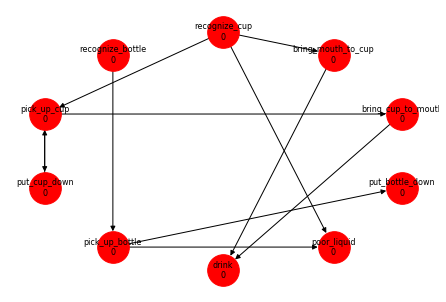

In [4]:
# successor
# ネットワーク構造にする
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# ネットワークの定義（有向グラフ）
graph_successor = nx.DiGraph()

# ノードの追加
graph_successor.add_node(recognize_cup)
graph_successor.add_node(recognize_bottle)
graph_successor.add_node(pick_up_cup)
graph_successor.add_node(put_cup_down)
graph_successor.add_node(pick_up_bottle)
graph_successor.add_node(drink)
graph_successor.add_node(poor_liquid)
graph_successor.add_node(put_bottle_down)
graph_successor.add_node(bring_cup_to_mouth)
graph_successor.add_node(bring_mouth_to_cup)

pos_module = {
        n: (np.cos(2*i*np.pi/10+np.pi/2), np.sin(2*i*np.pi/10+np.pi/2))
        for i, n in enumerate(graph_successor.nodes)
    }

# エッジの追加
graph_successor.add_edge(recognize_cup,pick_up_cup)
graph_successor.add_edge(recognize_cup,bring_mouth_to_cup)
graph_successor.add_edge(recognize_cup,poor_liquid)
graph_successor.add_edge(pick_up_cup,put_cup_down)
graph_successor.add_edge(put_cup_down,pick_up_cup)
graph_successor.add_edge(pick_up_cup,bring_cup_to_mouth)
graph_successor.add_edge(recognize_bottle,pick_up_bottle)
graph_successor.add_edge(pick_up_bottle,poor_liquid)
graph_successor.add_edge(pick_up_bottle,put_bottle_down)
graph_successor.add_edge(bring_cup_to_mouth,drink)
graph_successor.add_edge(bring_mouth_to_cup,drink)

nx.draw(graph_successor,pos_module,with_labels=True, font_size=8, node_size=1000, font_color='k', node_color="r")

plt.show()

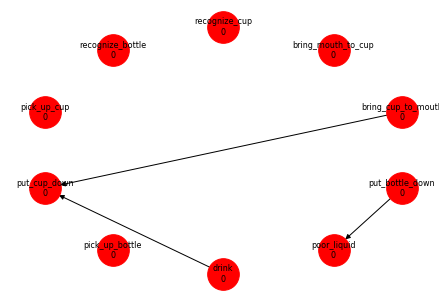

In [5]:
# conflictor
# ネットワーク構造にする
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# ネットワークの定義（有向グラフ）
graph_conflictor = nx.DiGraph()

# ノードの追加
graph_conflictor.add_node(recognize_cup)
graph_conflictor.add_node(recognize_bottle)
graph_conflictor.add_node(pick_up_cup)
graph_conflictor.add_node(put_cup_down)
graph_conflictor.add_node(pick_up_bottle)
graph_conflictor.add_node(drink)
graph_conflictor.add_node(poor_liquid)
graph_conflictor.add_node(put_bottle_down)
graph_conflictor.add_node(bring_cup_to_mouth)
graph_conflictor.add_node(bring_mouth_to_cup)

pos_module = {
        n: (np.cos(2*i*np.pi/10+np.pi/2), np.sin(2*i*np.pi/10+np.pi/2))
        for i, n in enumerate(graph_conflictor.nodes)
    }

# エッジの追加
graph_conflictor.add_edge(drink,put_cup_down)
graph_conflictor.add_edge(put_bottle_down,poor_liquid)
graph_conflictor.add_edge(bring_cup_to_mouth,put_cup_down)

nx.draw(graph_conflictor,pos_module,with_labels=True, font_size=8, node_size=1000, font_color='k', node_color="r")

plt.show()

In [6]:
# グラフの描写と保存
def save_fig():
    fig = plt.figure()
    node_color = list(color.values())
    nx.draw(graph_successor,pos_module, node_color =node_color, with_labels=True, font_size=8, node_size=1000, font_color='k')
    if k >= 10:
        fig.savefig("./img/activation{}.png".format(k))
    else:
        fig.savefig("./img/activation0{}.png".format(k))
        
# networkxの色分け
color = {
        n: 'orange'
        for i, n in enumerate(graph_successor.nodes)
    }

1
recognize_bottle
54
2
pick_up_bottle
59
3
recognize_cup
55
4
poor_liquid
46
5
put_bottle_down
35
6
pick_up_cup
61
7
bring_cup_to_mouth
74
8
drink
96


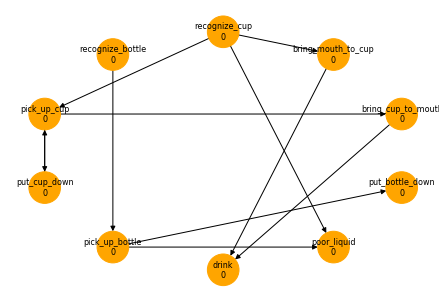

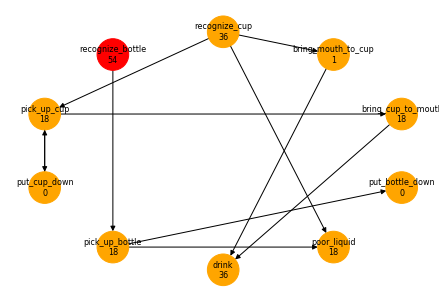

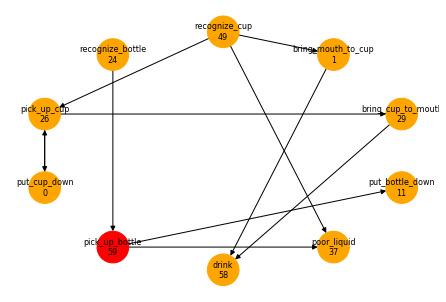

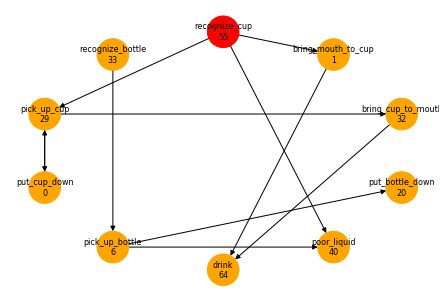

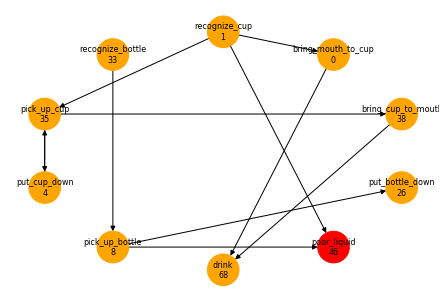

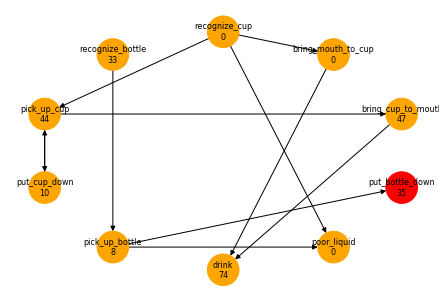

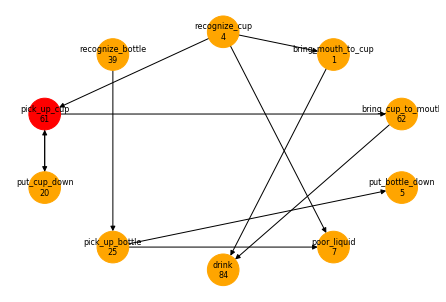

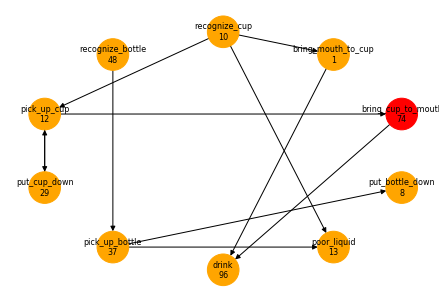

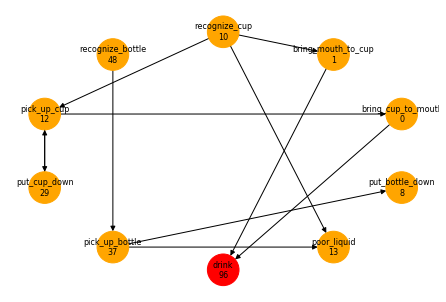

In [7]:
import random
# 初期状態の定義
ENV_LIST = ["be_polite", "object_observed", "hand_empty1", "hand_empty2", "cup_empty"]
MODULE_LIST = [recognize_cup, recognize_bottle, pick_up_cup, put_cup_down, pick_up_bottle, poor_liquid, put_bottle_down, bring_cup_to_mouth, bring_mouth_to_cup, drink]
GOAL = "relieve_thirst"
ACTION = ""
D = 3
G = 2
C = 2
M = 1

k = 0
save_fig()

# 実行
while True:
    # ゴール状態が達成されていれば終了
    if GOAL in ENV_LIST:
        break
    
    # モジュールごとの更新幅のリスト
    update_activation_list = []
    # リンクを通じたものを格納
    suc_pre_update = dict()
    # 全てのモジュールに対して、活性レベルを更新
    for module in MODULE_LIST:
        before = module.activation_level
        module.update_activation()
        after = module.activation_level
        update_activation_list.append(after - before)
        suc_pre_update[module.name] = 0

    # successor,predessorの適応
    for i, module in enumerate(MODULE_LIST):
        if update_activation_list[i] > 0:
            # successor
            successor_link = [path for path in graph.successors(module.name)]
            for link in successor_link:
                suc_pre_update[link] += 0.5*update_activation_list[i]
            # predessor
            predecessor_link = [path for path in graph.predecessors(module.name)]
            for link in predecessor_link:
                suc_pre_update[link] += 0.3*update_activation_list[i]
    
    # リンクを考慮した更新
    for module in MODULE_LIST:
        module.activation_level += int(suc_pre_update[module.name])
            
    
    
    
    # モジュールの活性レベルが閾値を超えていて、condition_listがENV_LISTに含まれていればそのモジュールを実行
    for module in MODULE_LIST:
        if module.activation_level > module.theat and set(module.condition_list) == (set(module.condition_list) & set(ENV_LIST)):
            k += 1
            color[module] = "red"
            save_fig()
            print(str(k) + "\n" + str(module))
            module.update_condition()
            color[module] = "orange"
    
    if random.random() > 0.7:
        ENV_LIST = list(set(ENV_LIST+["object_observed"]))